In [9]:
import cv2
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

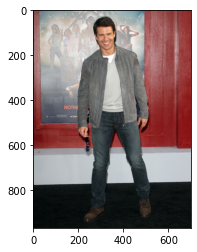

In [5]:
img = cv2.imread("examples/img_2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
img.shape

(967, 700, 3)

In [7]:
import imutils

In [8]:
org_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [9]:
cv2.imshow("Original Image", org_img)
cv2.waitKey(0)

27

## Used KMeans Clustering to find the cluster of colors present in image

In [10]:
cluster = KMeans(n_clusters=5)
cluster.fit(img.reshape(-1,3))

KMeans(n_clusters=5)

In [11]:
cluster.cluster_centers_

array([[195.03374276, 195.689034  , 194.92172852],
       [142.28373549,  49.95359908,  48.99728431],
       [ 85.52821665,  88.71641083,  90.88951703],
       [ 18.8089625 ,  22.46301139,  23.18472172],
       [152.6411609 , 127.89366169, 126.52905396]])

In [12]:
arr = cluster.cluster_centers_

In [13]:
arr

array([[195.03374276, 195.689034  , 194.92172852],
       [142.28373549,  49.95359908,  48.99728431],
       [ 85.52821665,  88.71641083,  90.88951703],
       [ 18.8089625 ,  22.46301139,  23.18472172],
       [152.6411609 , 127.89366169, 126.52905396]])

In [14]:
def show_dominant_colors(arr):
    color_deck = np.zeros((50, 300, 3), dtype= np.uint8)
    steps = 300 / arr.shape[0]
    for idx, ele in enumerate(arr):
        color_deck[:, int(idx*steps):(int((idx+1)*steps)), :] = ele
    return color_deck

## No. of Color Occuring in the Images

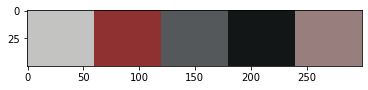

In [15]:
plt.imshow(show_dominant_colors(arr))

In [16]:
len(cluster.labels_)

676900

In [17]:
from collections import Counter

In [19]:
def show_dominant_colors_frequency(arr, len_of_pixels, count):
    
    color_deck = np.zeros((50, 300, 3), dtype= np.uint8)
    no_of_pixels = len_of_pixels
    percentage = {}
    for i in count:
        percentage[i] = np.round((count[i] / no_of_pixels), 2)
    
    percentage = dict(sorted(percentage.items()))
    print(percentage)
    
    steps = 0
    for idx, ele in enumerate(arr):
        color_deck[:, steps:int(steps+ percentage[idx]*300+1), :] = ele
        steps += int(percentage[idx]*300+1)
    
    return color_deck

## Frequency / Percentage of color occuring in image

{0: 0.28, 1: 0.19, 2: 0.12, 3: 0.25, 4: 0.16}


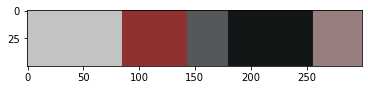

In [19]:
plt.imshow(show_dominant_colors_frequency(arr, len(cluster.labels_)))

In [47]:
def get_Colors(img):
    
    # img = cv2.imread(img_path)
    fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    cluster = KMeans(n_clusters=5)
    cluster.fit(fix_img.reshape(-1,3))
    
    count = Counter(cluster.labels_)
    arr = cluster.cluster_centers_
    
    len_of_pixels = len(cluster.labels_)
    f = plt.figure(figsize=(10,7))
    f.add_subplot(1,2, 1)
    plt.imshow(fix_img)
    f.add_subplot(1,2, 2)
    plt.imshow(show_dominant_colors_frequency(arr, len(cluster.labels_), count))
    plt.show(block=True)
    #plt.imshow(fix_img)
    #plt.imshow(show_dominant_colors_frequency(arr, len(cluster.labels_), count))

{0: 0.5, 1: 0.09, 2: 0.09, 3: 0.18, 4: 0.13}


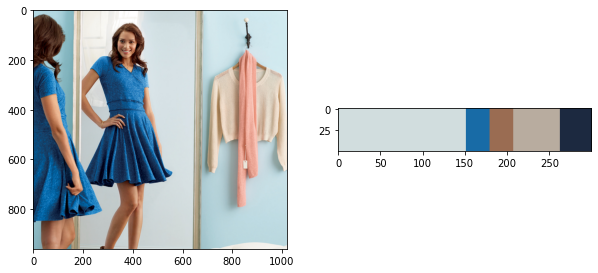

In [41]:
get_Colors('examples/img_1.jpg')

In [44]:
import os

In [45]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [46]:
images = load_images_from_folder('PETA_dataset/MIT/archive/')

{0: 0.33, 1: 0.07, 2: 0.06, 3: 0.49, 4: 0.06}


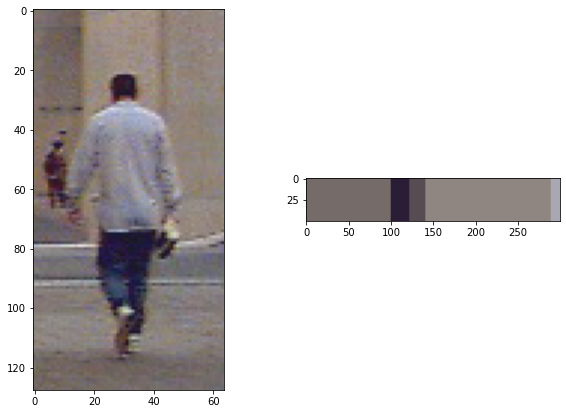

{0: 0.06, 1: 0.05, 2: 0.34, 3: 0.06, 4: 0.49}


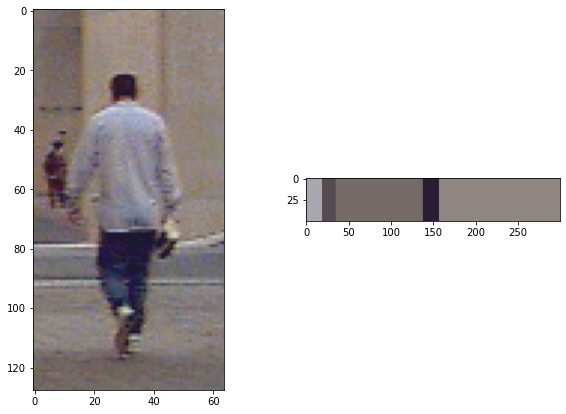

{0: 0.23, 1: 0.26, 2: 0.39, 3: 0.03, 4: 0.09}


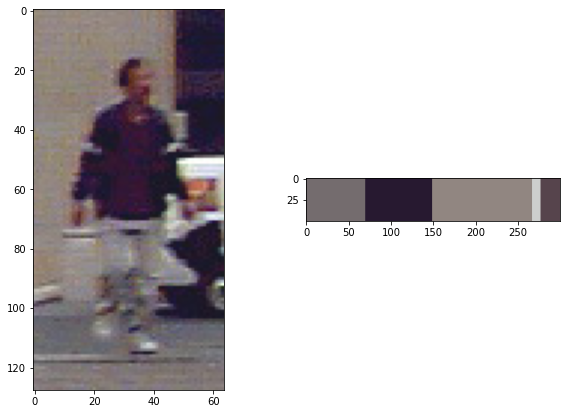

{0: 0.25, 1: 0.17, 2: 0.29, 3: 0.16, 4: 0.13}


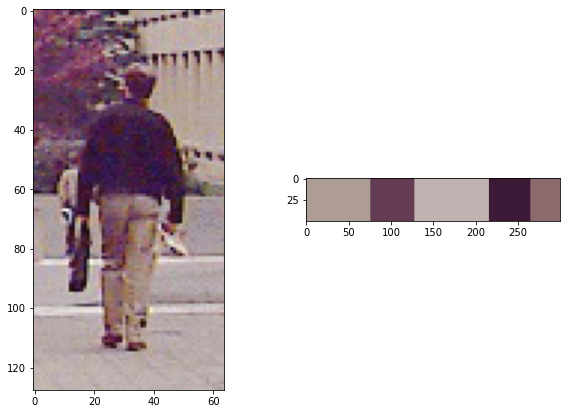

{0: 0.33, 1: 0.12, 2: 0.36, 3: 0.1, 4: 0.08}


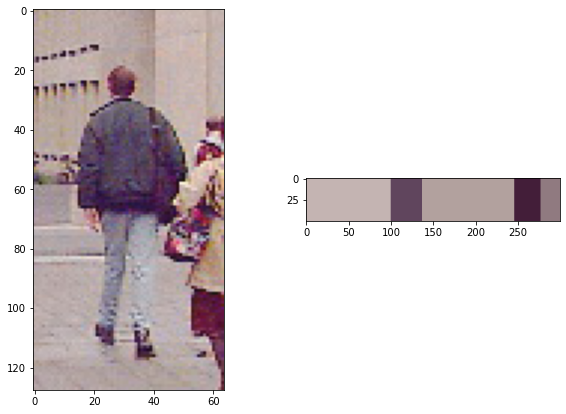

{0: 0.18, 1: 0.33, 2: 0.24, 3: 0.13, 4: 0.13}


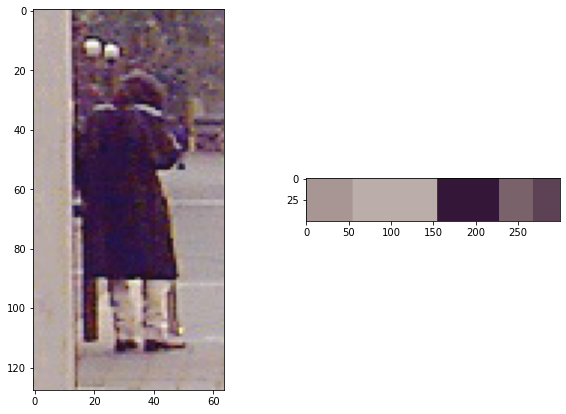

{0: 0.28, 1: 0.25, 2: 0.2, 3: 0.23, 4: 0.03}


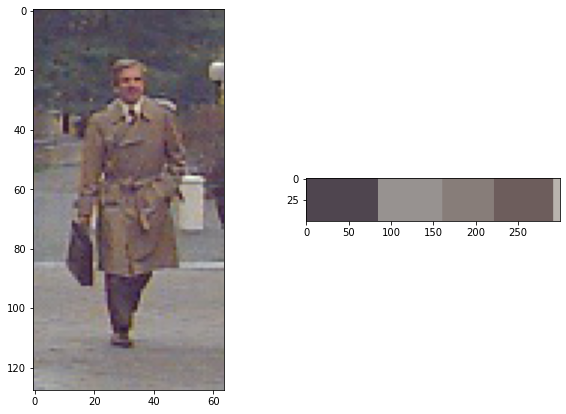

{0: 0.03, 1: 0.22, 2: 0.26, 3: 0.17, 4: 0.31}


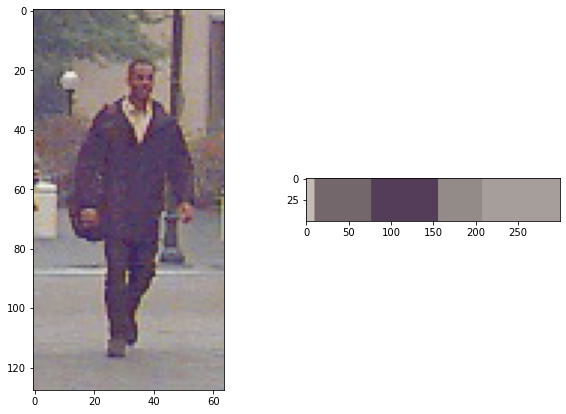

{0: 0.37, 1: 0.17, 2: 0.05, 3: 0.08, 4: 0.32}


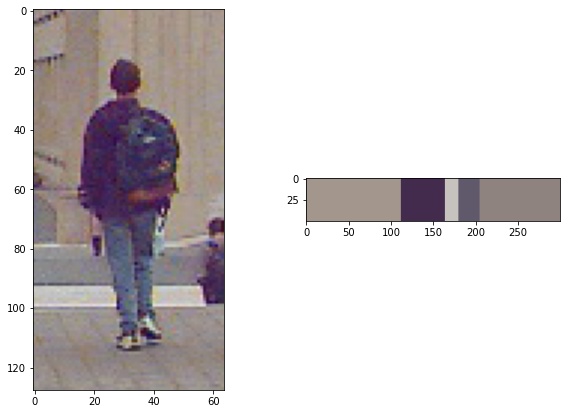

{0: 0.2, 1: 0.49, 2: 0.08, 3: 0.16, 4: 0.07}


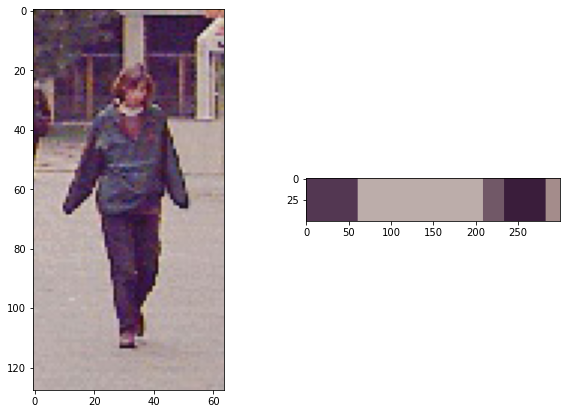

In [48]:
for img in images[:10]:
    get_Colors(img)

In [49]:
images = load_images_from_folder('PETA_dataset/VIPeR/archive/')

{0: 0.26, 1: 0.04, 2: 0.3, 3: 0.23, 4: 0.16}


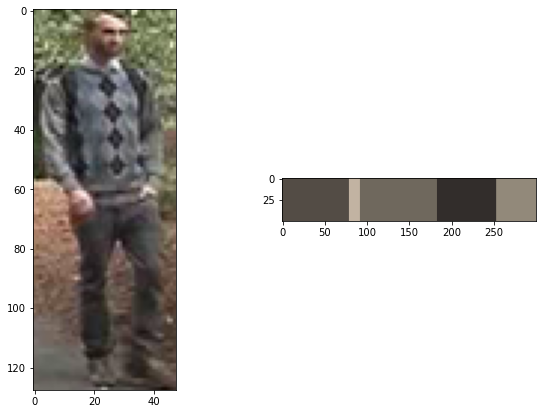

{0: 0.34, 1: 0.15, 2: 0.04, 3: 0.29, 4: 0.18}


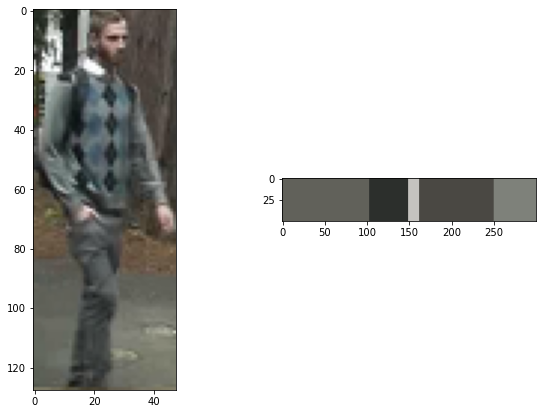

{0: 0.22, 1: 0.26, 2: 0.15, 3: 0.22, 4: 0.15}


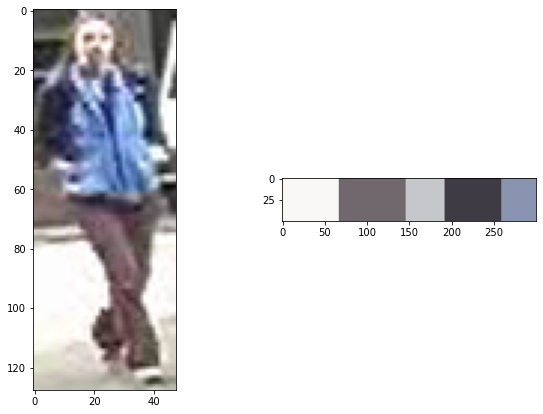

{0: 0.19, 1: 0.28, 2: 0.08, 3: 0.21, 4: 0.24}


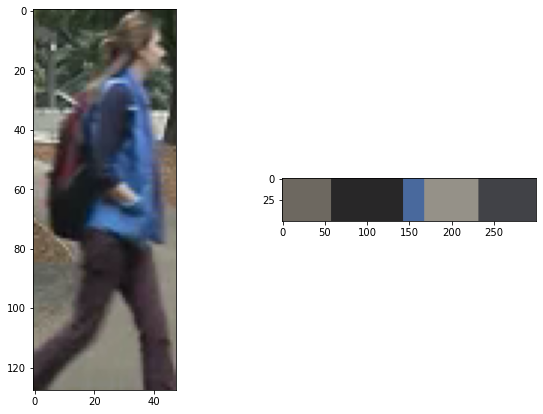

{0: 0.21, 1: 0.22, 2: 0.21, 3: 0.24, 4: 0.12}


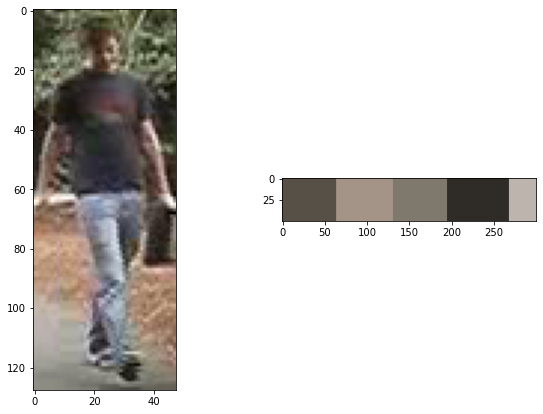

{0: 0.28, 1: 0.11, 2: 0.33, 3: 0.06, 4: 0.21}


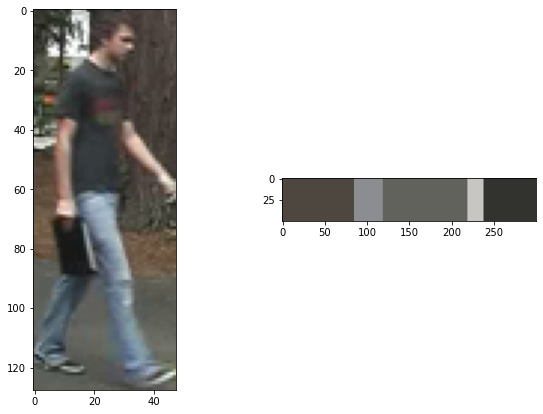

{0: 0.22, 1: 0.28, 2: 0.22, 3: 0.07, 4: 0.21}


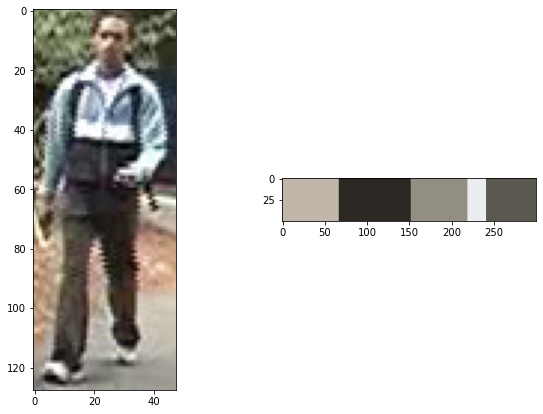

{0: 0.25, 1: 0.07, 2: 0.35, 3: 0.1, 4: 0.24}


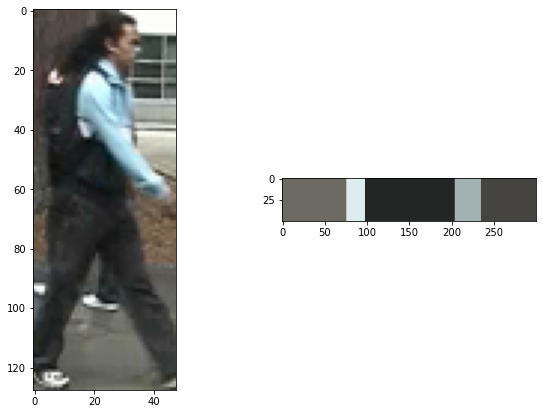

{0: 0.32, 1: 0.15, 2: 0.14, 3: 0.25, 4: 0.14}


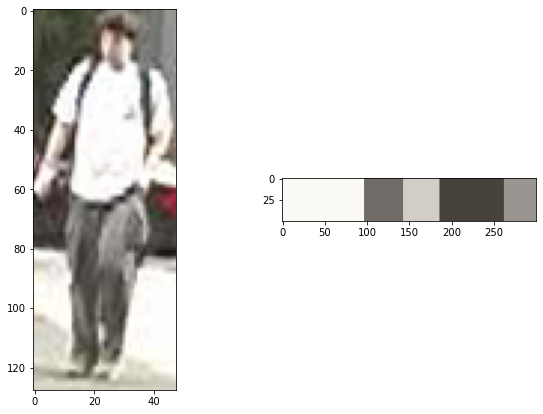

{0: 0.36, 1: 0.11, 2: 0.15, 3: 0.3, 4: 0.08}


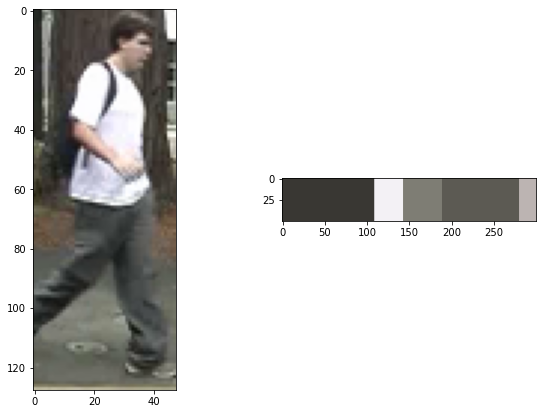

In [50]:
for img in images[:10]:
    get_Colors(img)